# Sleep Quality Predictors.Model Classification

In [89]:
import pandas as pd
df=pd.read_csv('sleep_cycle_productivity.csv')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from tabulate import tabulate

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           5000 non-null   object 
 1   Person_ID                      5000 non-null   int64  
 2   Age                            5000 non-null   int64  
 3   Gender                         5000 non-null   object 
 4   Sleep Start Time               5000 non-null   float64
 5   Sleep End Time                 5000 non-null   float64
 6   Total Sleep Hours              5000 non-null   float64
 7   Sleep Quality                  5000 non-null   int64  
 8   Exercise (mins/day)            5000 non-null   int64  
 9   Caffeine Intake (mg)           5000 non-null   int64  
 10  Screen Time Before Bed (mins)  5000 non-null   int64  
 11  Work Hours (hrs/day)           5000 non-null   float64
 12  Productivity Score             5000 non-null   i

In [36]:
df.head()

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9


In [37]:
df.isnull().sum()         # tushib qolgan qiymatlar yo'q

Date                             0
Person_ID                        0
Age                              0
Gender                           0
Sleep Start Time                 0
Sleep End Time                   0
Total Sleep Hours                0
Sleep Quality                    0
Exercise (mins/day)              0
Caffeine Intake (mg)             0
Screen Time Before Bed (mins)    0
Work Hours (hrs/day)             0
Productivity Score               0
Mood Score                       0
Stress Level                     0
dtype: int64

In [38]:
print(df.columns)

Index(['Date', 'Person_ID', 'Age', 'Gender', 'Sleep Start Time',
       'Sleep End Time', 'Total Sleep Hours', 'Sleep Quality',
       'Exercise (mins/day)', 'Caffeine Intake (mg)',
       'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)',
       'Productivity Score', 'Mood Score', 'Stress Level'],
      dtype='object')


In [91]:
df.drop(columns=['Date'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Person_ID                      5000 non-null   int64  
 1   Age                            5000 non-null   int64  
 2   Gender                         5000 non-null   object 
 3   Sleep Start Time               5000 non-null   float64
 4   Sleep End Time                 5000 non-null   float64
 5   Total Sleep Hours              5000 non-null   float64
 6   Sleep Quality                  5000 non-null   int64  
 7   Exercise (mins/day)            5000 non-null   int64  
 8   Caffeine Intake (mg)           5000 non-null   int64  
 9   Screen Time Before Bed (mins)  5000 non-null   int64  
 10  Work Hours (hrs/day)           5000 non-null   float64
 11  Productivity Score             5000 non-null   int64  
 12  Mood Score                     5000 non-null   i

In [92]:
def categorize_sleep_quality(score):
    if score <= 2:
        return 'Poor'
    elif score <= 5:
        return 'Okay'
    elif score <= 7:
        return 'Good'
    else:
        return 'Excellent'


In [93]:
df['Sleep Quality'] = df['Sleep Quality'].apply(categorize_sleep_quality)

In [10]:
df.head()

,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,1860,32,Other,23.33,4.61,5.28,Okay,86,87,116,8.808920,8,3,6
1,1769,41,Female,21.02,2.43,5.41,Okay,32,21,88,6.329833,10,3,7
2,2528,20,Male,22.10,3.45,5.35,Good,17,88,59,8.506306,10,9,10
3,8041,37,Other,23.10,6.65,7.55,Excellent,46,34,80,6.070240,8,4,2
4,4843,46,Other,21.42,4.17,6.75,Excellent,61,269,94,11.374994,8,7,9


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Person_ID                      5000 non-null   int64  
 1   Age                            5000 non-null   int64  
 2   Gender                         5000 non-null   object 
 3   Sleep Start Time               5000 non-null   float64
 4   Sleep End Time                 5000 non-null   float64
 5   Total Sleep Hours              5000 non-null   float64
 6   Sleep Quality                  5000 non-null   object 
 7   Exercise (mins/day)            5000 non-null   int64  
 8   Caffeine Intake (mg)           5000 non-null   int64  
 9   Screen Time Before Bed (mins)  5000 non-null   int64  
 10  Work Hours (hrs/day)           5000 non-null   float64
 11  Productivity Score             5000 non-null   int64  
 12  Mood Score                     5000 non-null   i

In [95]:
df['Gender'].value_counts()

Gender
Male      1718
Female    1675
Other     1607
Name: count, dtype: int64

In [96]:
df['Sleep Quality'].value_counts()

Sleep Quality
Okay         1519
Excellent    1492
Good         1006
Poor          983
Name: count, dtype: int64

In [97]:
# Encoding
label=LabelEncoder()

In [98]:
df['Gender']=label.fit_transform(df['Gender'])

In [99]:
ordinal=OrdinalEncoder

In [100]:
encoder=OrdinalEncoder(categories=[['Poor','Okay','Good','Excellent']])

In [101]:
df[['Sleep Quality']] = encoder.fit_transform(df[['Sleep Quality']])

In [102]:
df['Sleep Quality'] = df['Sleep Quality'].astype(int)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Person_ID                      5000 non-null   int64  
 1   Age                            5000 non-null   int64  
 2   Gender                         5000 non-null   int64  
 3   Sleep Start Time               5000 non-null   float64
 4   Sleep End Time                 5000 non-null   float64
 5   Total Sleep Hours              5000 non-null   float64
 6   Sleep Quality                  5000 non-null   int64  
 7   Exercise (mins/day)            5000 non-null   int64  
 8   Caffeine Intake (mg)           5000 non-null   int64  
 9   Screen Time Before Bed (mins)  5000 non-null   int64  
 10  Work Hours (hrs/day)           5000 non-null   float64
 11  Productivity Score             5000 non-null   int64  
 12  Mood Score                     5000 non-null   i

In [103]:
df.head()

,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,1860,32,2,23.33,4.61,5.28,1,86,87,116,8.808920,8,3,6
1,1769,41,0,21.02,2.43,5.41,1,32,21,88,6.329833,10,3,7
2,2528,20,1,22.10,3.45,5.35,2,17,88,59,8.506306,10,9,10
3,8041,37,2,23.10,6.65,7.55,3,46,34,80,6.070240,8,4,2
4,4843,46,2,21.42,4.17,6.75,3,61,269,94,11.374994,8,7,9


In [104]:
# Feature Engineering
import numpy as np

# Nap Duration
df['Nap Duration'] = (8 - df['Total Sleep Hours']) * 10 + df['Stress Level'] * 5 - df['Mood Score'] * 3 - df['Work Hours (hrs/day)'] * 2
df['Nap Duration'] = np.maximum(df['Nap Duration'], 0)  # Manfiy qiymatlarni 0ga olib kelish

# Room Environment
df['Room Environment'] = df['Sleep Quality'] * 10 - df['Screen Time Before Bed (mins)'] * 0.3 - df['Caffeine Intake (mg)'] * 0.05
df['Room Environment'] = df['Room Environment'].clip(0, 100)  # 0-100 oraliqqa cheklash

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Person_ID                      5000 non-null   int64  
 1   Age                            5000 non-null   int64  
 2   Gender                         5000 non-null   int64  
 3   Sleep Start Time               5000 non-null   float64
 4   Sleep End Time                 5000 non-null   float64
 5   Total Sleep Hours              5000 non-null   float64
 6   Sleep Quality                  5000 non-null   int64  
 7   Exercise (mins/day)            5000 non-null   int64  
 8   Caffeine Intake (mg)           5000 non-null   int64  
 9   Screen Time Before Bed (mins)  5000 non-null   int64  
 10  Work Hours (hrs/day)           5000 non-null   float64
 11  Productivity Score             5000 non-null   int64  
 12  Mood Score                     5000 non-null   i

In [24]:
df[['Nap Duration','Room Environment']].describe()

,Nap Duration,Room Environment
count,5000.000000,5000.00000
mean,12.472526,1.81944
std,14.928831,4.84330
min,0.000000,0.00000
25%,0.000000,0.00000
50%,6.348696,0.00000
75%,22.051567,0.00000
max,69.575729,29.15000


In [106]:
df.head()

,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level,Nap Duration,Room Environment
0,1860,32,2,23.33,4.61,5.28,1,86,87,116,8.808920,8,3,6,30.582160,0.0
1,1769,41,0,21.02,2.43,5.41,1,32,21,88,6.329833,10,3,7,39.240334,0.0
2,2528,20,1,22.10,3.45,5.35,2,17,88,59,8.506306,10,9,10,32.487389,0.0
3,8041,37,2,23.10,6.65,7.55,3,46,34,80,6.070240,8,4,2,0.000000,4.3
4,4843,46,2,21.42,4.17,6.75,3,61,269,94,11.374994,8,7,9,13.750012,0.0


In [107]:
# Scaling
scaler=MinMaxScaler()


In [108]:
numerical_columns=df.select_dtypes(include='number').columns

In [53]:
numerical_columns

Index(['Person_ID', 'Age', 'Gender', 'Sleep Start Time', 'Sleep End Time',
       'Total Sleep Hours', 'Sleep Quality', 'Exercise (mins/day)',
       'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)',
       'Work Hours (hrs/day)', 'Productivity Score', 'Mood Score',
       'Stress Level', 'Nap Duration', 'Room Environment'],
      dtype='object')

In [109]:
df[numerical_columns]=scaler.fit_transform(df[numerical_columns])

In [110]:
df.head()

,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level,Nap Duration,Room Environment
0,0.095577,0.341463,1.0,0.836683,0.457111,0.156,0.333333,0.966292,0.290970,0.648045,0.601176,0.777778,0.222222,0.555556,0.439552,0.000000
1,0.085463,0.560976,0.0,0.256281,0.211061,0.182,0.333333,0.359551,0.070234,0.491620,0.291254,1.000000,0.222222,0.666667,0.563995,0.000000
2,0.169816,0.048780,0.5,0.527638,0.326185,0.170,0.666667,0.191011,0.294314,0.329609,0.563345,1.000000,0.888889,1.000000,0.466936,0.000000
3,0.782507,0.463415,1.0,0.778894,0.687359,0.610,1.000000,0.516854,0.113712,0.446927,0.258802,0.777778,0.333333,0.111111,0.000000,0.147513
4,0.427095,0.682927,1.0,0.356784,0.407449,0.450,1.000000,0.685393,0.899666,0.525140,0.921973,0.777778,0.666667,0.888889,0.197627,0.000000


In [111]:
df.drop('Person_ID', axis=1, inplace=True)

# Model Training

In [113]:
x = df.drop('Sleep Quality',axis=1)
y = df['Sleep Quality']
x_train,x_temp,y_train,y_temp = train_test_split(x,y,test_size=0.2,random_state=42)
x_test,x_val,y_test,y_val = train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

# Model Selection

In [114]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Logistic Regression

In [115]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)

In [116]:
accuracy_score_lg = accuracy_score(y_test,y_pred)
print(f'Logistic Regression Accuracy: {accuracy_score_lg:.2f}')
cr_lg = classification_report(y_test,y_pred, output_dict=True)
print(classification_report(y_test,y_pred))

Logistic Regression Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.74      0.96      0.84       344
           1       0.75      0.27      0.40       156

    accuracy                           0.74       500
   macro avg       0.75      0.61      0.62       500
weighted avg       0.75      0.74      0.70       500



# Decision Tree Classifier

In [134]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [135]:
accuracy_score_dt = dt_model.score(x_test, y_test)
print("Accuracy Score: ", accuracy_score_dt)
cm_dt = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

Accuracy Score:  0.726
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       344
           1       1.00      0.40      0.57       156

    accuracy                           0.81       500
   macro avg       0.89      0.70      0.72       500
weighted avg       0.85      0.81      0.78       500



In [136]:
param_grid = {
  'max_depth': [3,5,10,None],
  'min_samples_split': [2,5,10],
  'min_samples_leaf': [1,2,5],
  'max_features': ['sqrt','log2',None]
}

grid_search = GridSearchCV(estimator = dt_model, param_grid= param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [137]:
best_model_dt = grid_search.best_estimator_
best_model_dt.fit(x_train, y_train)
y_pred = best_model_dt.predict(x_test)
accuracy_score_best_model_dt = accuracy_score(y_test, y_pred)
print(f'Best Model Accuracy: {accuracy_score_best_model_dt:.2f}')
cr_best_model_dt = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

Best Model Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       344
           1       0.98      0.37      0.54       156

    accuracy                           0.80       500
   macro avg       0.88      0.68      0.71       500
weighted avg       0.84      0.80      0.77       500



# Random Forest Classifier

In [141]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [ ]:
accuracy_score_rf = rf.score(x_test, y_test)
print("Accuracy Score: ", accuracy_score_rf)
cr_best_model_rf = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

Accuracy Score:  0.796
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       344
           1       0.94      0.37      0.53       156

    accuracy                           0.80       500
   macro avg       0.86      0.68      0.70       500
weighted avg       0.83      0.80      0.76       500



In [143]:
param_grid = {
  'max_depth': [3,5,10,None],
  'min_samples_split': [2,5,10],
  'min_samples_leaf': [1,2,5],
  'max_features': ['sqrt','log2',None]
}

grid_search = GridSearchCV(estimator = rf, param_grid= param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [144]:
best_model_rf = grid_search.best_estimator_
best_model_rf.fit(x_train, y_train)
y_pred = best_model_rf.predict(x_test)
accuracy_score_best_model_rf = accuracy_score(y_test, y_pred)
print(f'Best Model Accuracy: {accuracy_score_best_model_rf:.2f}')
cr_best_model_rf = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

Best Model Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       344
           1       1.00      0.40      0.57       156

    accuracy                           0.81       500
   macro avg       0.89      0.70      0.72       500
weighted avg       0.85      0.81      0.78       500



# Gradient Boosting

In [145]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)

In [ ]:
accuracy_score_gb = gb.score(x_test, y_test)
print("Accuracy Score: ", accuracy_score_gb)
cr_best_model_rf = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

Accuracy Score:  0.812
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       344
           1       1.00      0.40      0.57       156

    accuracy                           0.81       500
   macro avg       0.89      0.70      0.72       500
weighted avg       0.85      0.81      0.78       500



In [148]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'subsample': [0.8, 1.0]
}


grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(x_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 1.0}


In [149]:
best_model_gb = grid_search.best_estimator_
best_model_gb.fit(x_train, y_train)
y_pred = best_model_gb.predict(x_test)
accuracy_score_best_model_gb = accuracy_score(y_test, y_pred)
print(f'Best Model Accuracy: {accuracy_score_best_model_gb:.2f}')
cr_best_model_gb = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

Best Model Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       344
           1       1.00      0.40      0.57       156

    accuracy                           0.81       500
   macro avg       0.89      0.70      0.72       500
weighted avg       0.85      0.81      0.78       500



# XGB classifier

In [123]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [124]:
accuracy_score_xgb = xgb.score(x_test, y_test)
print("Accuracy Score: ", accuracy_score_xgb)
cm_xgb = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

Accuracy Score:  0.796
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       344
           1       0.79      0.47      0.59       156

    accuracy                           0.80       500
   macro avg       0.80      0.71      0.73       500
weighted avg       0.80      0.80      0.78       500



# lightgbm Classifier

In [125]:
lgb = LGBMClassifier()
lgb.fit(x_train, y_train)
y_pred = lgb.predict(x_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1177, number of negative: 2823
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2080
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.294250 -> initscore=-0.874831
[LightGBM] [Info] Start training from score -0.874831


In [126]:
accuracy_score_lgb = lgb.score(x_test, y_test)
print("Accuracy Score: ", accuracy_score_lgb)
cm_lgb = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

Accuracy Score:  0.8
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       344
           1       0.86      0.43      0.57       156

    accuracy                           0.80       500
   macro avg       0.82      0.70      0.72       500
weighted avg       0.81      0.80      0.78       500



# Model comparison

In [150]:
data = [
    ["Logistic Regression", accuracy_score_lg, cr_lg['0']['precision'], cr_lg['0']['recall'], cr_lg['0']['f1-score']],
    ["Decision Tree Classifier", accuracy_score_best_model_dt, cr_best_model_dt['0']['precision'], cr_best_model_dt['0']['recall'], cr_best_model_dt['0']['f1-score']],
    ["Random Forest Classifier", accuracy_score_best_model_rf, cr_best_model_rf['0']['precision'], cr_best_model_rf['0']['recall'], cr_best_model_rf['0']['f1-score']],
    ["Gradient Boosting Classifier", accuracy_score_best_model_gb, cr_best_model_rf['0']['precision'], cr_best_model_rf['0']['recall'], cr_best_model_rf['0']['f1-score']],
    ["XGBoost Classifier", accuracy_score_xgb, cm_xgb['0']['precision'], cm_xgb['0']['recall'], cm_xgb['0']['f1-score']],
    ["LightGBM Classifier", accuracy_score_lgb, cm_lgb['0']['precision'], cm_lgb['0']['recall'], cm_lgb['0']['f1-score']],
]

sorted_data = sorted(data, key=lambda x: x[1], reverse=True)

headers = ['Model', 'accuracy score', 'Precision', 'Recall', 'F1-Score']
print(tabulate(sorted_data, headers=headers, tablefmt='grid')) 

+------------------------------+------------------+-------------+----------+------------+
| Model                        |   accuracy score |   Precision |   Recall |   F1-Score |
+==============================+==================+=============+==========+============+
| Random Forest Classifier     |            0.812 |    0.785388 | 1        |   0.879795 |
+------------------------------+------------------+-------------+----------+------------+
| Gradient Boosting Classifier |            0.812 |    0.785388 | 1        |   0.879795 |
+------------------------------+------------------+-------------+----------+------------+
| Decision Tree Classifier     |            0.802 |    0.777778 | 0.997093 |   0.873885 |
+------------------------------+------------------+-------------+----------+------------+
| LightGBM Classifier          |            0.8   |    0.7891   | 0.968023 |   0.869452 |
+------------------------------+------------------+-------------+----------+------------+
| XGBoost 

# Kfold Cross Validation

In [156]:
# Kfold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []
y = y.astype('int')
for model in [lg, best_model_dt, best_model_rf, best_model_gb, xgb, lgb]:
    cv_results = cross_val_score(model, x, y, cv=kf, scoring='accuracy')
    results.append((model.__class__.__name__, cv_results.mean(), cv_results.std()))
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)
print(tabulate(sorted_results, headers=['Model', 'Mean Accuracy', 'Std Dev'], tablefmt='grid'))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1177, number of negative: 2823
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2080
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.294250 -> initscore=-0.874831
[LightGBM] [Info] Start training from score -0.874831
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1192, number of negative: 2808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2092
[LightGBM] [Info] Number of data points in the train set: 4000, number of used featu

/var/folders/2z/kf92m3b96t51tf0khtbqm3xh0000gn/T/ipykernel_61010/1910237843.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cv, x='Mean Accuracy', y='Model', palette='viridis')


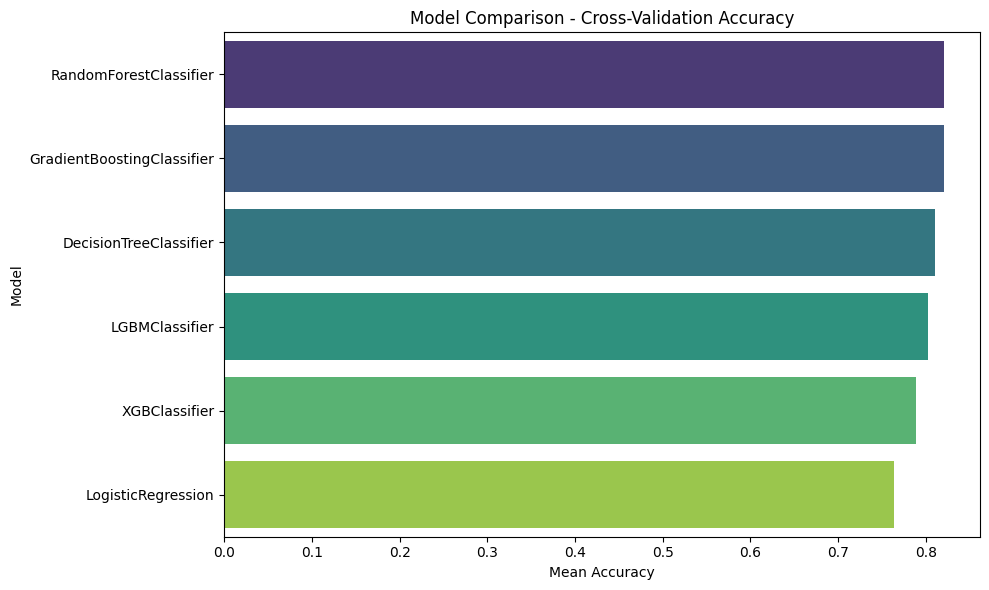

In [157]:
model_names = [row[0] for row in sorted_results]
mean_scores = [row[1] for row in sorted_results]
std_devs = [row[2] for row in sorted_results]

df_cv = pd.DataFrame(sorted_results, columns=['Model', 'Mean Accuracy', 'Std Dev'])

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_cv, x='Mean Accuracy', y='Model', palette='viridis')

plt.title('Model Comparison - Cross-Validation Accuracy')
plt.tight_layout()
plt.show()